#digits classification using multi-layer perceptron and keras
(keras tensorflow and pytorch lib for dl)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist 


load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


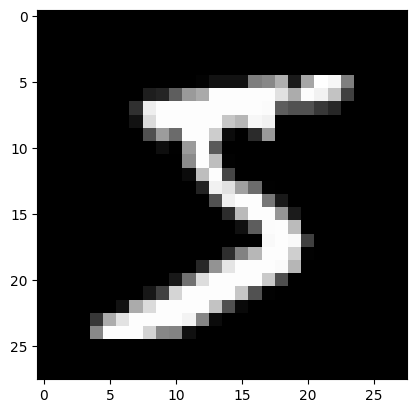

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [6]:
y_test=to_categorical(y_test)



architecture

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))

c:\Users\Greeshma\Desktop\ai-ml-bc\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#compile

In [18]:


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

train

test accuracy and loss

In [19]:
result=model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=64 , validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9725 - loss: 0.1233 - val_accuracy: 0.9720 - val_loss: 0.1289
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9731 - loss: 0.1141 - val_accuracy: 0.9720 - val_loss: 0.1396
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9747 - loss: 0.1129 - val_accuracy: 0.9734 - val_loss: 0.1554
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9761 - loss: 0.1038 - val_accuracy: 0.9736 - val_loss: 0.1295
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9767 - loss: 0.0939 - val_accuracy: 0.9692 - val_loss: 0.1666
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9774 - loss: 0.0988 - val_accuracy: 0.9720 - val_loss: 0.1532
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9774 - loss: 0.0978 - val_accuracy: 0.9704 - val_loss: 0.1880
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9772 - loss: 0.1030 - val_accuracy: 0.

In [20]:
loss,accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')
print(f'Test loss: {loss}')
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9507 - loss: 0.5895
Test accuracy: 0.9506999850273132
Test loss: 0.5894812941551208
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.9724791646003723, 0.9730833172798157, 0.9746875166893005, 0.9761250019073486, 0.976729154586792, 0.9774166941642761, 0.9773541688919067, 0.9771875143051147, 0.9774166941642761, 0.979479193687439], [0.123340904712677, 0.11408494412899017, 0.11291710287332535, 0.10375060886144638, 0.09386710822582245, 0.09876862913370132, 0.09782003611326218, 0.10304004698991776, 0.1091906875371933, 0.08650660514831543], [0.972000002861023, 0.972000002861023, 0.9734166860580444, 0.9735833406448364, 0.9691666960716248, 0.972000002861023, 0.9704166650772095, 0.9713333249092102, 0.9695000052452087, 0.9662500023841858], [0.12892600893974304, 0.1396252065896988, 0.1554405391216278, 0.12954024970531464, 0.1665668487548828, 0.15318605303764343, 0.18799647688865662, 0.16629092395305634, 0.193437859416

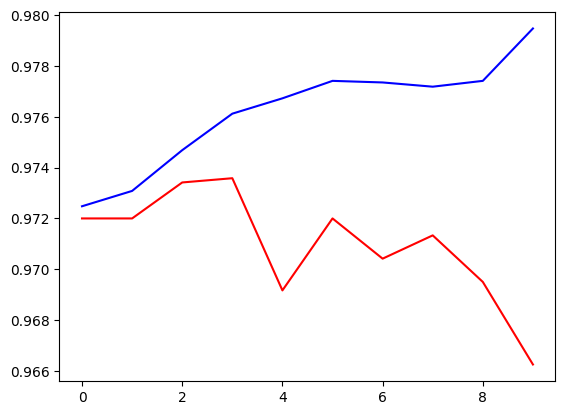

In [23]:
plt.plot(result.history['accuracy'], label='training accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='red')

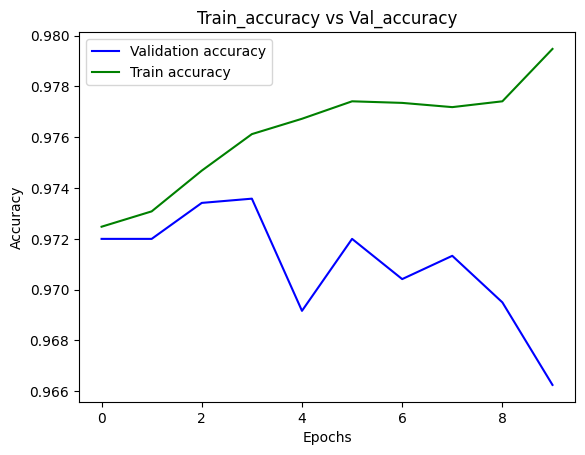

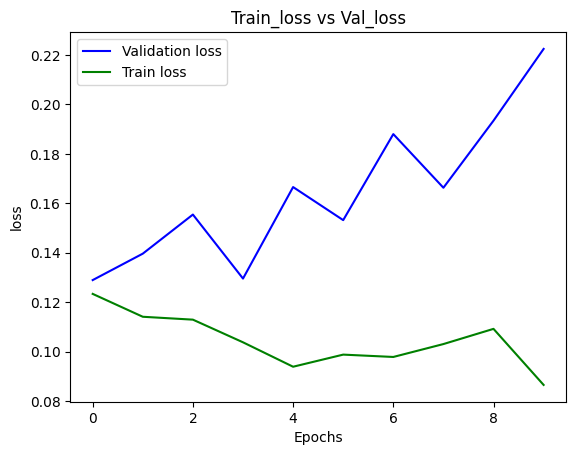

In [24]:
#visualization
plt.plot(result.history['val_accuracy'],label='Validation accuracy',color="blue")
plt.plot(result.history['accuracy'],label='Train accuracy',color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


plt.plot(result.history['val_loss'],label='Validation loss',color="blue")
plt.plot(result.history['loss'],label='Train loss',color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()